# Support Vector Machines

### Some plotting functions

In [71]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random

In [72]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 25,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 25,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('aack')
    plt.ylabel('beep')
    plt.legend(['happy','sad'])
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

In [73]:
import pandas as pd
X = pd.DataFrame([[1,0],[0,2],[1,1],[0,1],[1,3],[2,2],[3,2],[2,3]])
y = pd.Series([0,0,0,0,1,1,1,1])

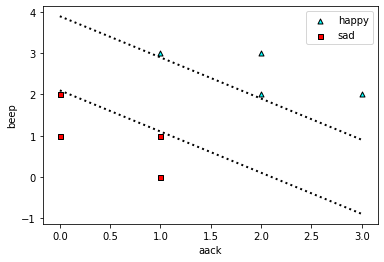

In [74]:
# Plotting the points
plot_points(X, y)

# Uncomment the following line to see a good line fit for this data.
draw_line(1,1,-3.9, linestyle='dotted')
draw_line(1,1,-2.1, linestyle='dotted')

### The SVM Algorithm

In [75]:
def score(weights, bias, features):
    return features.dot(weights) + bias

def prediction(weights, bias, features):
    return int(score(weights, bias, features) >= 0)

def lr_prediction_error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))

def svm_prediction_error(weights, bias, features, label):
    pred_1 = prediction(weights, bias+1, features)
    pred_2 = prediction(weights, bias-1, features)
    error = 0
    if pred_1 != label:
        error += np.abs(score(weights, bias+1, features))
    if pred_2 != label:
        error += np.abs(score(weights, bias-1, features))
    return error
    
def svm_margin_error(weights):
    return np.dot(weights, weights)
    
def svm_error(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        features = X.loc[i]
        label = y[i]
        total_error += svm_prediction_error(weights, bias, features, label)
    total_error = total_error/len(y)
    total_error += svm_margin_error(weights)
    return total_error

In [76]:
weights = [1,1]
bias = -3.5
features = X
labels = y
total_error = 0

print(svm_error(weights, bias, X, y))

2.125


In [78]:
def svm_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    pred_1 = prediction(weights, bias+1, features)
    pred_2 = prediction(weights, bias-1, features)

    # If pred_1 misclassifies the point
    if label==1 and pred_1 == 0:
        for i in range(len(weights)):
            weights[i] += features[i]*learning_rate
        bias += learning_rate
    if label==0 and pred_1 == 1:
        for i in range(len(weights)):
            weights[i] -= features[i]*learning_rate
        bias -= learning_rate

    # If pred_2 misclassifies the point
    if label==1 and pred_2 == 0:
        for i in range(len(weights)):
            weights[i] += features[i]*learning_rate
        bias += learning_rate
    if label==0 and pred_2 == 1:
        for i in range(len(weights)):
            weights[i] -= features[i]*learning_rate
        bias -= learning_rate

    # Separate the lines
    for i in range(len(weights)):
        weights[i] *= (1-learning_rate)
    bias *= (1-learning_rate)

    return weights, bias

TypeError: cannot convert the series to <class 'int'>

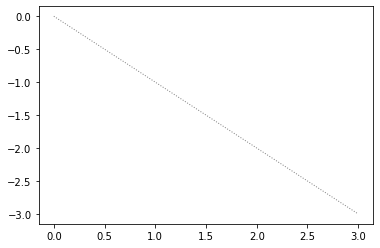

In [124]:
def build_svm(X, y, epochs = 1000, learning_rate = 0.01, C=1):
    weights = [1.0 for i in range(len(X.loc[0]))]
    bias = 0
    classification_errors = []
    distance_errors = []
    errors = []
    for epoch in range(epochs):
        #draw_line(weights[0], weights[1], bias+1, color='red', linewidth=1.0, linestyle='dotted')
        #draw_line(weights[0], weights[1], bias-1, color='blue', linewidth=1.0, linestyle='dotted')
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')

        # Pick a random point
        random_point = random.randint(0, len(X)-1)
        features = X.loc[random_point]
        label = y.loc[random_point]
        #print(random_point)
        #print(features)
        #print(label)
        weights, bias = svm_trick(weights, bias, features, label)
        #print(weights, bias)
        errors.append(svm_error(weights, bias, X, y))
        classification_errors.append(svm_prediction_error(weights, bias, X, y))
        distance_errors.append(svm_margin_error(weights, bias, X, y))

    draw_line(weights[0], weights[1], bias+1, color='red')
    draw_line(weights[0], weights[1], bias-1, color='blue')

    plot_points(X, y)
    plt.show()
    plt.scatter(range(epochs), errors)

    plt.show()
    plt.scatter(range(epochs), classification_errors)

    plt.show()
    plt.scatter(range(epochs), distance_errors)

    return weights, bias

build_svm(X,y)

In [46]:
# DON'T RUN
def svm_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    if pred == label:
        return weights, bias
    else:
        if label==1 and pred==0:
            for i in range(len(weights)):
                weights[i] += features[i]*learning_rate
            bias += learning_rate
        elif label==0 and pred==1:
            for i in range(len(weights)):
                weights[i] -= features[i]*learning_rate
            bias -= learning_rate
    #weights *= (1-learning_rate)
    return weights, bias

def perceptron_trick_clever(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
        bias += (label-pred)*learning_rate
    return weights, bias

In [73]:
random.seed(0)
def svm_algorithm(X, y, learning_rate = 0.01, epochs = 200):
    weights = np.array([1.0 for i in range(len(X.loc[0]))])
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Uncomment the following line to draw all the intermediate classifiers
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        errors.append(total_error(weights, bias, X, y))
        j = random.randint(0, len(features)-1)
        weights, bias = svm_trick(weights, bias, X.loc[j], y[j])
    draw_line(weights[0], weights[1], bias)
    plot_points(X, y)
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

In [79]:
svm_algorithm(X, y)

NameError: name 'svm_algorithm' is not defined

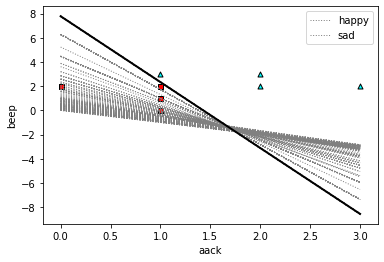

(array([0.49, 0.09]), -0.7000000000000004)

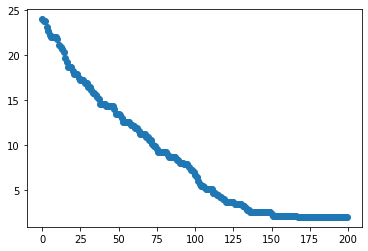

In [76]:
svm_algorithm(X, y)